# The Price is Right

Today we build a more complex solution for estimating prices of goods.

1. Day 2.0 notebook: create a RAG database with our 400,000 training data
2. Day 2.1 notebook: visualize in 2D
3. Day 2.2 notebook: visualize in 3D
4. Day 2.3 notebook: build and test a RAG pipeline with GPT-4o-mini
5. Day 2.4 notebook: (a) bring back our Random Forest pricer (b) Create a Ensemble pricer that allows contributions from all the pricers

Phew! That's a lot to get through in one day!

## PLEASE NOTE:

We already have a very powerful product estimator with our proprietary, fine-tuned LLM. Most people would be very satisfied with that! The main reason we're adding these extra steps is to deepen your expertise with RAG and with Agentic workflows.


In [1]:
# imports

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import re
import math
import json
from tqdm import tqdm
import random
from dotenv import load_dotenv
from huggingface_hub import login
import numpy as np
import pickle
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
from sklearn.manifold import TSNE
import plotly.graph_objects as go

C:\Users\trananhtu\AppData\Local\anaconda3\envs\llms\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
# It is very fun turning this up to 400_000 and seeing the full dataset visualized,
# but it almost crashes my box every time so do that at your own risk!! 10_000 is safe!

MAXIMUM_DATAPOINTS = 10_000

In [4]:
DB = "products_vectorstore"
client = chromadb.PersistentClient(path=DB)

In [5]:
collection = client.get_or_create_collection('products')

In [6]:
CATEGORIES = ['Appliances', 'Automotive', 'Cell_Phones_and_Accessories', 'Electronics','Musical_Instruments', 'Office_Products', 'Tools_and_Home_Improvement', 'Toys_and_Games']
COLORS = ['red', 'blue', 'brown', 'orange', 'yellow', 'green' , 'purple', 'cyan']

In [11]:
# Prework
result = collection.get(include=['embeddings', 'documents', 'metadatas'], limit=MAXIMUM_DATAPOINTS)
vectors = np.array(result['embeddings'])
documents = result['documents']
categories = [metadata['category'] for metadata in result['metadatas']]
colors = [COLORS[CATEGORIES.index(c)] for c in categories]

In [12]:
# Let's try a 2D chart

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
reduced_vectors = tsne.fit_transform(vectors)

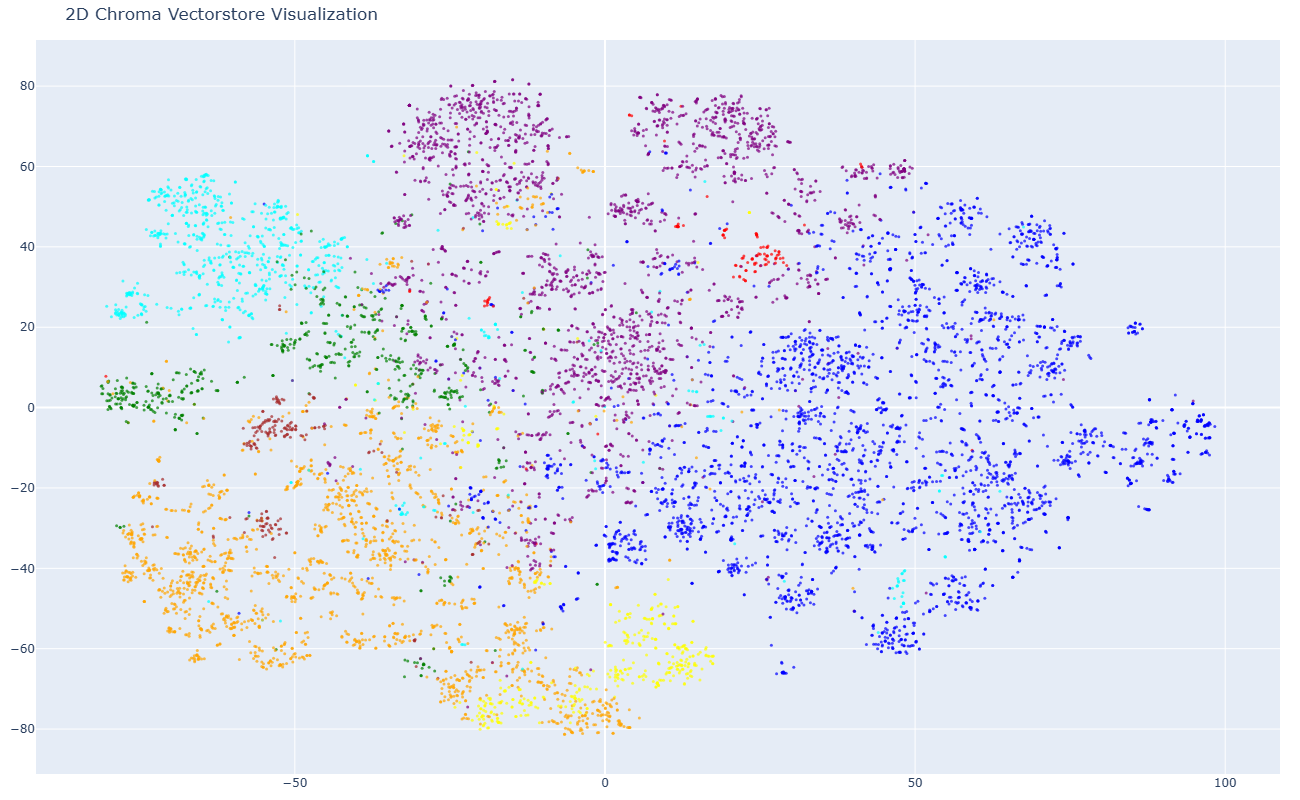

In [13]:

# Create the 2D scatter plot
fig = go.Figure(data=[go.Scatter(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    mode='markers',
    marker=dict(size=3, color=colors, opacity=0.7),
)])

fig.update_layout(
    title='2D Chroma Vectorstore Visualization',
    scene=dict(xaxis_title='x', yaxis_title='y'),
    width=1200,
    height=800,
    margin=dict(r=20, b=10, l=10, t=40)
)

fig.show()